In [1]:
from __future__ import print_function, division
import os

import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


Files already downloaded and verified
Files already downloaded and verified


In [3]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False)


classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

foreground_classes = {'horse','ship', 'truck'}

background_classes = {'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog'}

# print(type(foreground_classes))

In [4]:
dataiter = iter(trainloader)
background_data=[]
background_label=[]
foreground_data=[]
foreground_label=[]
batch_size=10
for i in range(5000):
    images, labels = dataiter.next()
    for j in range(batch_size):
        if(classes[labels[j]] in background_classes):
            img = images[j].tolist()
            background_data.append(img)
            background_label.append(labels[j])
        else:
            img = images[j].tolist()
            foreground_data.append(img)
            foreground_label.append(labels[j])
            
foreground_data = torch.tensor(foreground_data)
foreground_label = torch.tensor(foreground_label)
background_data = torch.tensor(background_data)
background_label = torch.tensor(background_label)
    

In [5]:
print(foreground_data.size())
print(background_data.size())
torch.save(foreground_data,'foreground_data.pt')
torch.save(background_data,'background_data.pt')
torch.save(foreground_label,'foreground_label.pt')
torch.save(background_label,'background_label.pt')
# torch.load()

torch.Size([15000, 3, 32, 32])
torch.Size([35000, 3, 32, 32])


In [6]:
torch.load('foreground_data.pt')
# print(foreground_data.size())
# print(background_data.size())

tensor([[[[ 0.9529,  0.9843,  1.0000,  ...,  0.6549,  0.6000,  0.5608],
          [ 0.9529,  0.9686,  0.9922,  ...,  0.6078,  0.5843,  0.5373],
          [ 0.8980,  0.9922,  0.9922,  ...,  0.5686,  0.5529,  0.5137],
          ...,
          [-0.7804, -0.7882, -0.8118,  ..., -0.1686, -0.1137, -0.1216],
          [-0.8431, -0.8588, -0.8118,  ..., -0.1608, -0.1294, -0.1137],
          [-0.7412, -0.4588, -0.3020,  ..., -0.0902, -0.0902, -0.0824]],

         [[ 0.9765,  0.9922,  1.0000,  ...,  0.7333,  0.7020,  0.6784],
          [ 0.9686,  0.9765,  0.9843,  ...,  0.7020,  0.6863,  0.6471],
          [ 0.9137,  1.0000,  0.9922,  ...,  0.6784,  0.6627,  0.6314],
          ...,
          [-0.7569, -0.7412, -0.7804,  ..., -0.1529, -0.0980, -0.1059],
          [-0.8353, -0.8667, -0.8118,  ..., -0.1451, -0.1137, -0.0980],
          [-0.7569, -0.4902, -0.3176,  ..., -0.0745, -0.0745, -0.0667]],

         [[ 0.9686,  0.9843,  1.0000,  ...,  0.7490,  0.7255,  0.7098],
          [ 0.9529,  0.9529,  

In [7]:

foreground_data = torch.load('foreground_data.pt')
background_data = torch.load('background_data.pt')
foreground_label = torch.load('foreground_label.pt')
background_label = torch.load('background_label.pt')


In [8]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

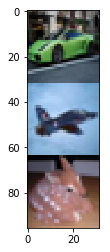

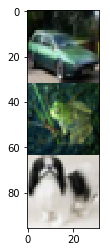

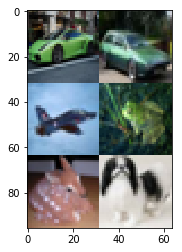

torch.Size([3, 96, 32])


In [9]:
img1 = torch.cat((background_data[0],background_data[1],background_data[2]),1)
imshow(img1)
img2 = torch.cat((background_data[27],background_data[3],background_data[43]),1)
imshow(img2)
img3 = torch.cat((img1,img2),2)
imshow(img3)
print(img2.size())

In [10]:
print(np.random.randint(1,15000,8))

[13791 11948  3769  4074 14091  4652 12177  2968]


In [11]:
def create_mosaic_img(bg_idx,fg_idx,fg):
    image_dict ={}
    j=0
    for i in range(9):
        if i != fg:
            image_dict['img'+str(i)] = background_data[bg_idx[j]].type("torch.DoubleTensor")
            j+=1
        else: 
            image_dict['img'+str(i)] = foreground_data[fg_idx].type("torch.DoubleTensor")
            label = foreground_label[fg_idx]-7
#     print(image_dict)
#     row1 = torch.cat((image_dict['img0'],image_dict['img1'],image_dict['img2']),2)
#     row2 = torch.cat((image_dict['img3'],image_dict['img4'],image_dict['img5']),2)
#     row3 = torch.cat((image_dict['img6'],image_dict['img7'],image_dict['img8']),2)
#     mosaic = torch.cat((row1,row2,row3),1)
#     return mosaic
    return image_dict,label

In [12]:
# print(bg_idx, fg_idx,fg)
# bg_idx = [0,1,2,27,3,43,99,155]
# fg_idx = 1
# fg = 5
# collage = create_mosaic_img(bg_idx,fg_idx,fg)
desired_num = 1000
mosaic_list_of_dict =[]        #lis of dict, each dict have img0-img9
fore_idx =[]                   #list of indexes at which foreground image is present in a mosaic image                
mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
for i in range(desired_num):
    bg_idx = np.random.randint(0,35000,8)
    fg_idx = np.random.randint(0,15000)
    fg = np.random.randint(0,9)
    fore_idx.append(fg)
    dict_1,label = create_mosaic_img(bg_idx,fg_idx,fg)
    mosaic_list_of_dict.append(dict_1)
    mosaic_label.append(label)
# imshow(mosaic_list_of_dict[0]['img4'])


In [ ]:
# print(len(mosaic_list_of_dict))
# print(classes[mosaic_label[13]])
# print(fore_idx[13])
# imshow(mosaic_list_of_dict[56]['img8'])
# print(type(mosaic_list_of_dict[1]['img0']))
print(mosaic_label)

In [13]:
import torch.nn as nn
import torch.nn.functional as F

class Module1(nn.Module):
    def __init__(self):
        super(Module1, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.fc4 = nn.Linear(10,1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
# net = Module1()
# print(net.parameters)

In [14]:
class Module2(nn.Module):
    def __init__(self):
        super(Module2, self).__init__()
        self.module1 = Module1().double()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.fc4 = nn.Linear(10,3)

    def forward(self,z):  #z be a dict of 9 images
        y = torch.zeros([32,32], dtype=torch.float64)
        x = torch.zeros([9],dtype=torch.float64)
        for i in range(9):
            x[i] = self.module1.forward(z['img'+str(i)][None,:,:,:])
            
#         print("x=",x)
#         print("its softmax", torch.softmax(x, dim=0))
        for i in range(9):
            y = y + (z['img'+str(i)]*x[i]).type("torch.DoubleTensor")

#         imshow(y.detach())
         
        
        y = self.pool(F.relu(self.conv1(y[None,:,:,:])))
        y = self.pool(F.relu(self.conv2(y)))
        y = y.view(-1, 16 * 5 * 5)
        
        y = F.relu(self.fc1(y))
        y = F.relu(self.fc2(y))
        y = F.relu(self.fc3(y))
        y = self.fc4(y)
        return y
    
fore_net = Module2().double()
print(fore_net.parameters)

<bound method Module.parameters of Module2(
  (module1): Module1(
    (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (fc1): Linear(in_features=400, out_features=120, bias=True)
    (fc2): Linear(in_features=120, out_features=84, bias=True)
    (fc3): Linear(in_features=84, out_features=10, bias=True)
    (fc4): Linear(in_features=10, out_features=1, bias=True)
  )
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=3, bias=True)
)>


In [16]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(fore_net.parameters(), lr=0.001, momentum=0.9)

In [17]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    cnt=0
    for data in (mosaic_list_of_dict):
        # get the inputs; data is a list of [inputs, labels]
        inputs = data
#         print(len(data))
        labels = mosaic_label[cnt][None,None]
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = fore_net(inputs)
#         print(outputs.shape,labels.shape , torch.argmax(outputs))
        loss = criterion(outputs, torch.max(labels, 1)[1]) 
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if cnt % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0
        cnt=cnt+1

print('Finished Training')

[1,  1000] loss: 0.273
[1,  1000] loss: 0.018
[2,  1000] loss: 0.002
[2,  1000] loss: 0.001
Finished Training


In [ ]:
for data in (mosaic_list_of_dict):
    print(data['img'+str(0)].size())


In [ ]:
mosaic_label[0][None,None].shape